### Import necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load and analysis the dataset 

In [2]:
df=pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [3]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
df.isnull().sum() #checking null values in each columns

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True) #drop redundant columns

In [6]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [7]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [8]:
df.shape

(5572, 2)

In [9]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [10]:
len(df[df.duplicated()]) #checking for duplicate values

403

In [11]:
df.drop_duplicates(keep='first',inplace=True) #remove all duplicates

In [12]:
df.shape

(5169, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [14]:
df['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

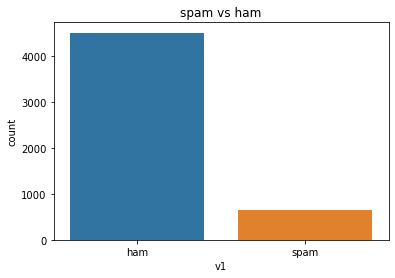

In [15]:
sns.countplot(data=df,x='v1')
plt.title('spam vs ham')
plt.show()

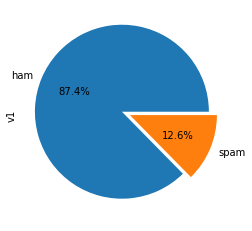

In [16]:
df['v1'].value_counts().plot(kind='pie',labels=['ham','spam'],autopct='%1.1f%%',explode=[0.1,0])
plt.show()

In [17]:
df['v1']=[1 if i =='spam' else 0 for i in df['v1']]

In [18]:
df.head(3)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [19]:
df['v1'].value_counts()

0    4516
1     653
Name: v1, dtype: int64

### Model building and evolution 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=df['v2']
Y=df['v1']

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [23]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(3618,) (1551,) (3618,) (1551,)


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
#convert a list of text documents into a matrix of token counts
cv=CountVectorizer()
X_train=cv.fit_transform(X_train.values)
X_test=cv.transform(X_test.values)
X_train.toarray()
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Logistic Regression 

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
Y_pred_train=lr.predict(X_train)
Y_pred_test=lr.predict(X_test)

In [29]:
print('Training accuracy:',accuracy_score(Y_train,Y_pred_train))
print('Test accuracy:',accuracy_score(Y_test,Y_pred_test))

Training accuracy: 0.9975124378109452
Test accuracy: 0.9780786589297228


In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1331
           1       0.97      0.87      0.92       220

    accuracy                           0.98      1551
   macro avg       0.98      0.93      0.95      1551
weighted avg       0.98      0.98      0.98      1551



### Multinomial Naïve Bayes Classifier 

In [31]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(X_train,Y_train)

MultinomialNB()

In [32]:
Y_pred_train=mn.predict(X_train)
Y_pred_test=mn.predict(X_test)

In [33]:
print('Training accuracy:',accuracy_score(Y_train,Y_pred_train))
print('Test accuracy:',accuracy_score(Y_test,Y_pred_test))

Training accuracy: 0.9928137092316197
Test accuracy: 0.9845261121856866


In [34]:
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1331
           1       0.98      0.91      0.94       220

    accuracy                           0.98      1551
   macro avg       0.98      0.95      0.97      1551
weighted avg       0.98      0.98      0.98      1551



### Check with some examples 

In [35]:
email = ['Get behind the wheel of a Hyundai EXTER today with Axis Bank CAR LOANS. Avail exclusive deals on financing with up to 50% on the processing fee* only available for a limited period. Hurry!']
email1 = cv.transform(email)
print(lr.predict(email1))

[0]


Output 0 implies not spam.

In [36]:
email = ['Get behind the wheel of a Hyundai EXTER today with Axis Bank CAR LOANS. Avail exclusive deals on financing with up to 50% on the processing fee* only available for a limited period. Hurry!']
email1 = cv.transform(email)
print(mn.predict(email1))

[0]


Output 0 implies not spam.

In [37]:
email = ['Dear Customer,Cash Loan up to Rs.5,00,000 in 2min EMI starts with Rs.1,000 Apply now http://2lm.in/XZ6COP  AB Finance']
email1 = cv.transform(email)
print(lr.predict(email1))

[1]


Output 1 implies it is a spam.

In [38]:
email = ['Dear Customer,Cash Loan up to Rs.5,00,000 in 2min EMI starts with Rs.1,000 Apply now http://2lm.in/XZ6COP  AB Finance']
email1 = cv.transform(email)
print(mn.predict(email1))

[1]


Output 1 implies it is a spam.